# Impact Chart Demo - The Impact of Income and Demographics on Housing Values

This notebook demonstrates the quickest and easiest way to construct a set of impact
charts for a dataset. First we load our data. Then we simply create an 
impact model, fit it, and use it to produce impact charts. Each of these three steps 
is just one statement.

In [1]:
from impactchart.model import XGBoostImpactModel

import impactchartdemo.dataset.homeowners as dataset

## Load our Data Set

In this demonstration, we will use a dataset with features representing the fraction of the population in an 
area that identifies as each of one of several demographic groups and a feature for the median income in the
area. The target variable is the median home value in the area. When all is said and done, there will be one
impact chart for each feature, showing the impact of different values of that feature that we observe in the 
data set on the target.

The areas we will use are all of the block groups in a single U.S. Census Core Based Statistical Area (CBSA).
A CBSA is what is commonly known as a metro area.

In [2]:
# Richmond, VA
CBSA = "40060"

This is the call that loads the actual data set. We get feature values in `X`,
the target value in `y`, and weights in `w`. `feature_names` and `target_name`
are nice human-readable names that we will put on our impact plots.

In [3]:
X, y, w, feature_names, target_name = dataset.get_data(CBSA)

## Generate the Impact Charts

An impact model is an object tha manages the creation of impact charts.

In [4]:
impact_model = XGBoostImpactModel(
    random_state=0x61E77BE9,
)

In [5]:
%%time

impact_model.fit(
    X,
    y,
    sample_weight=w,
    optimization_scoring_metric="neg_mean_absolute_percentage_error",
)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: user 24.5 s, sys: 17.2 s, total: 41.7 s
Wall time: 17 s


CPU times: user 4min 57s, sys: 15.7 s, total: 5min 13s
Wall time: 4min 44s


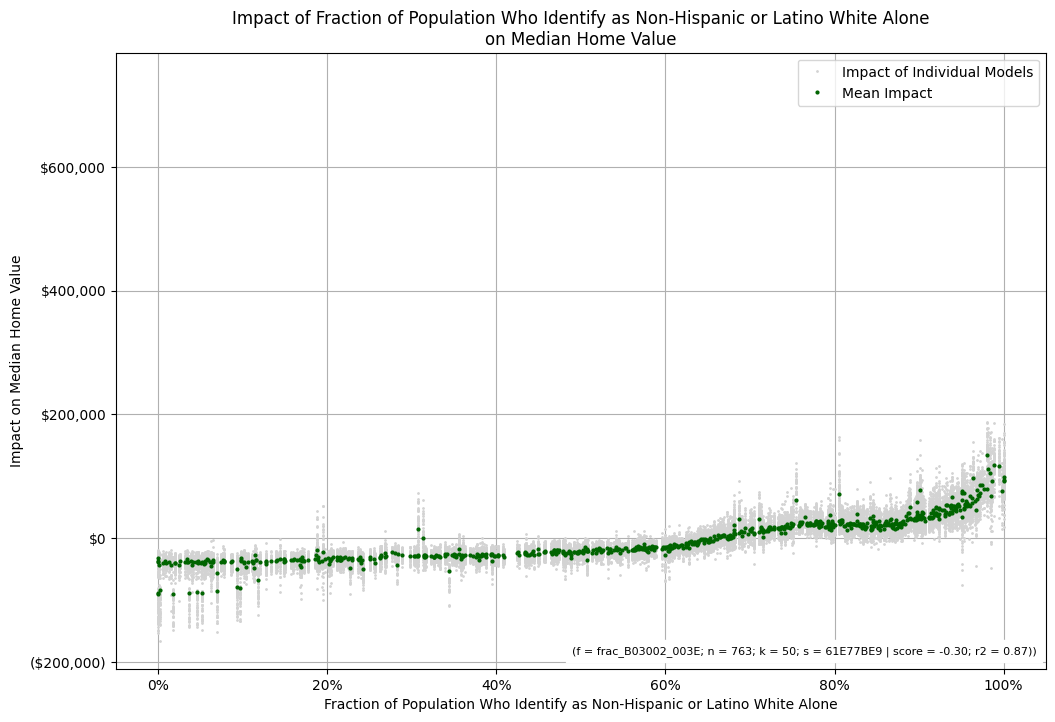

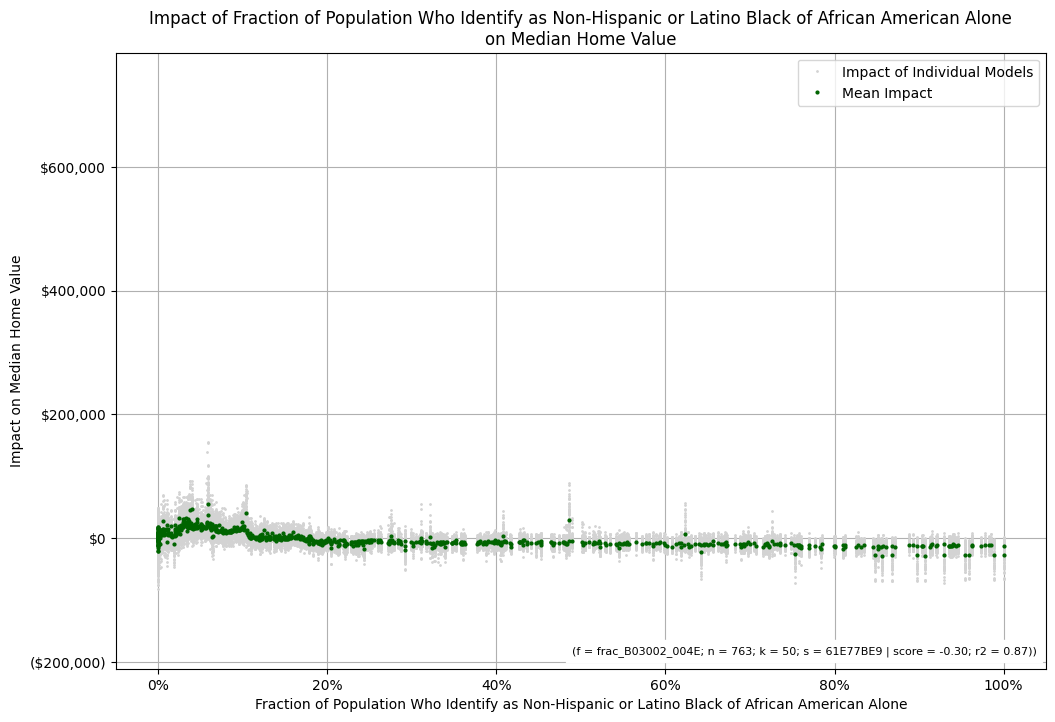

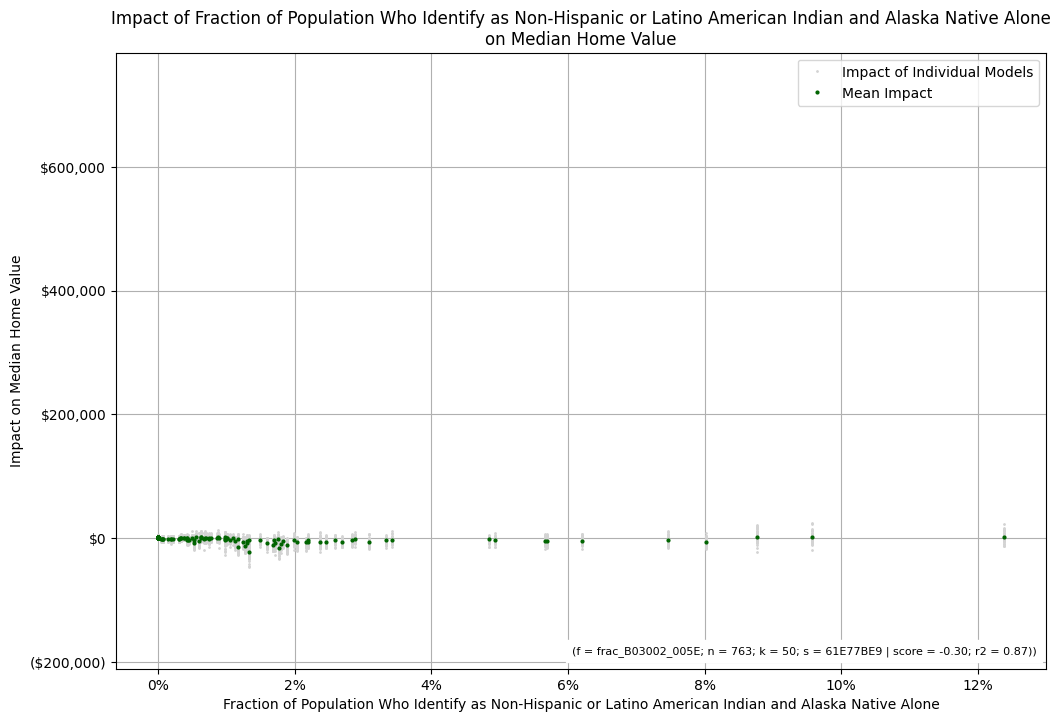

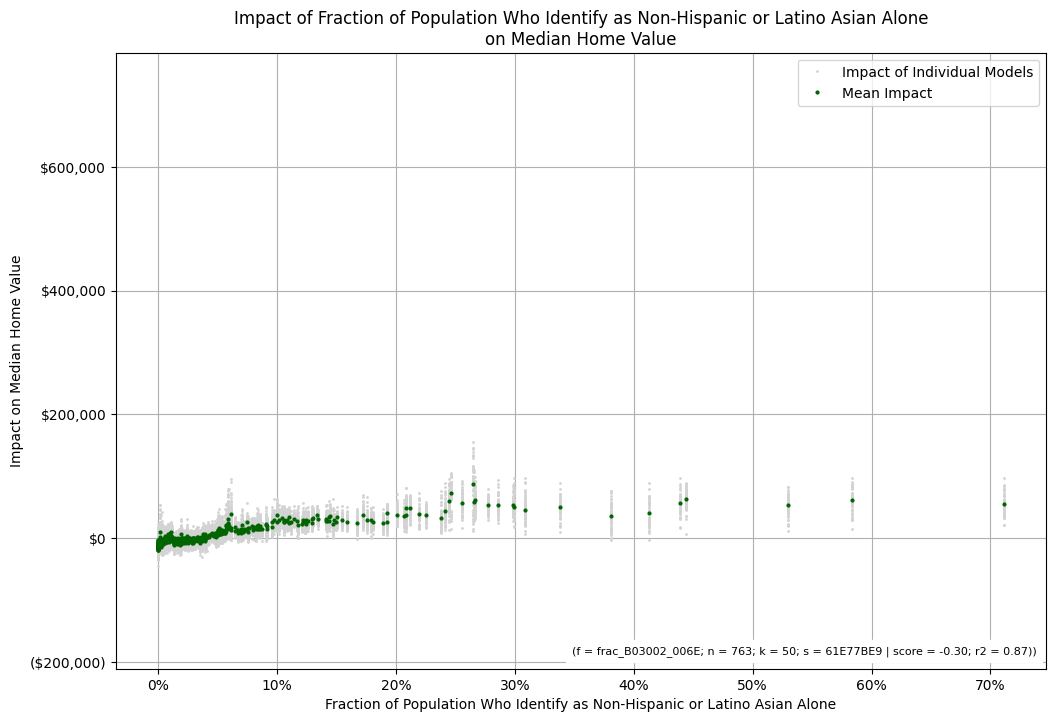

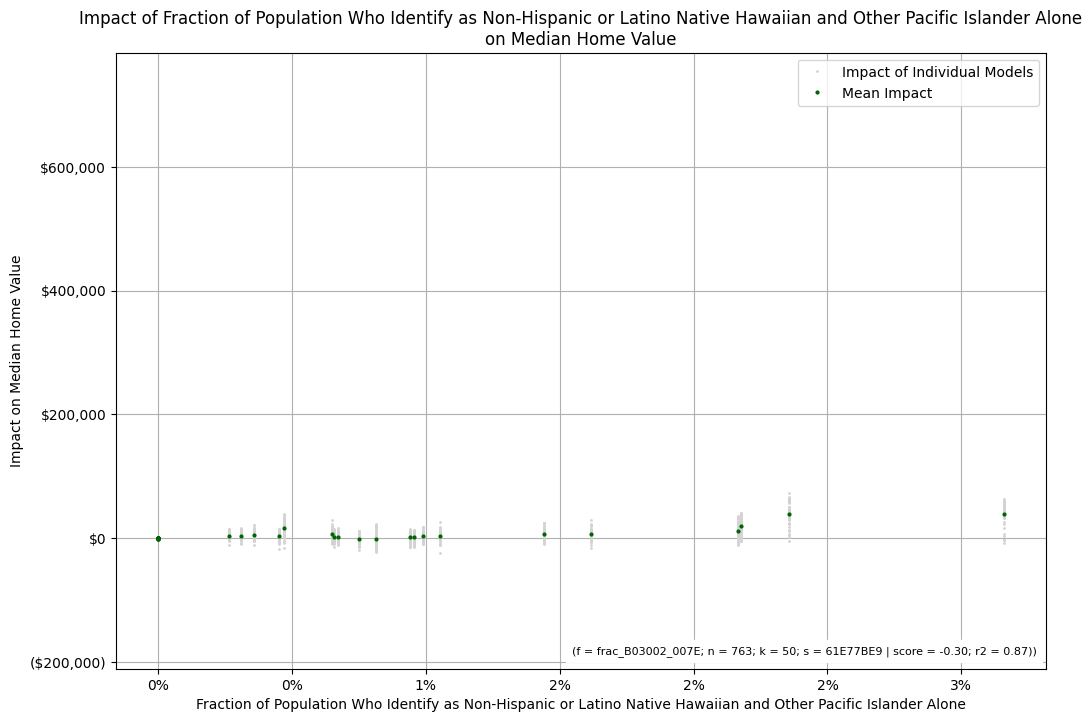

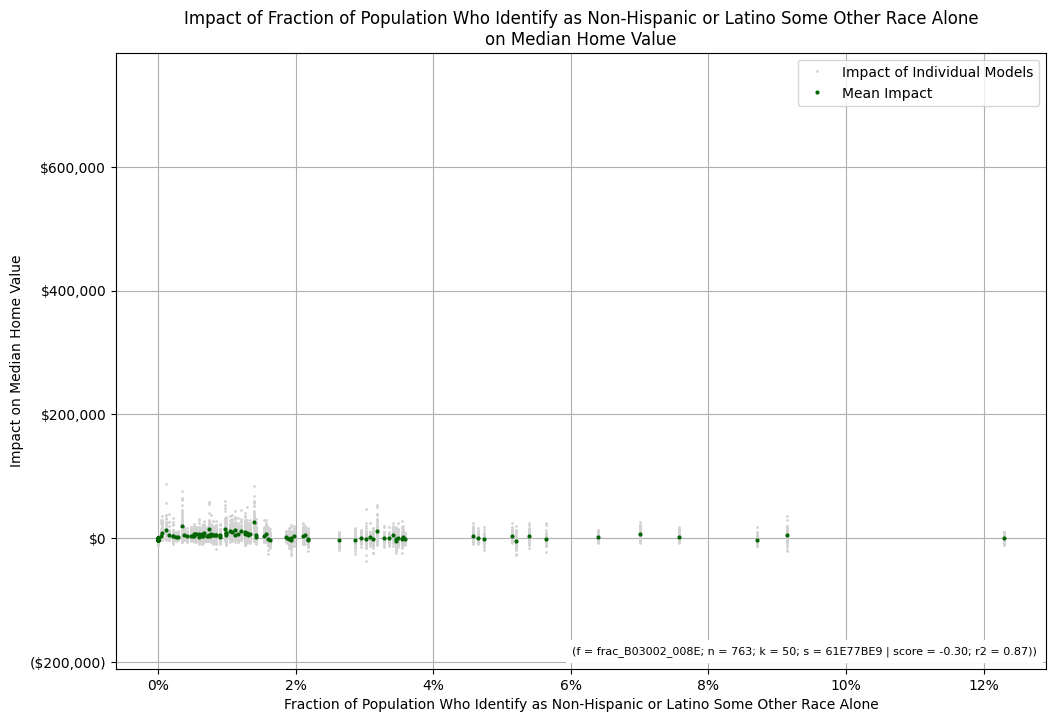

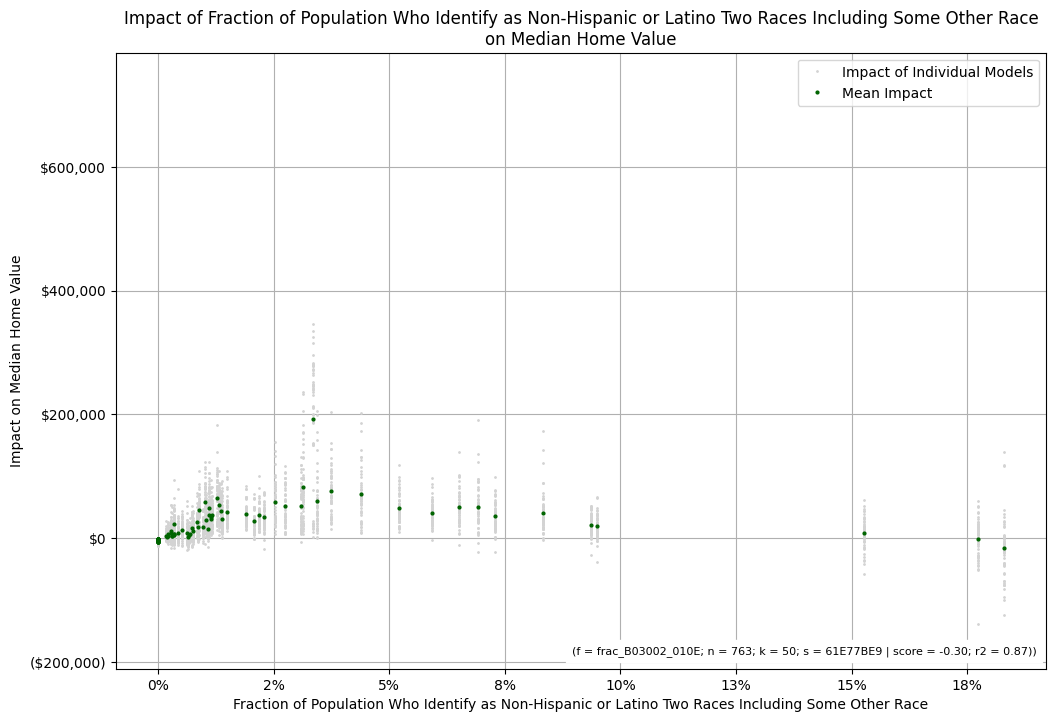

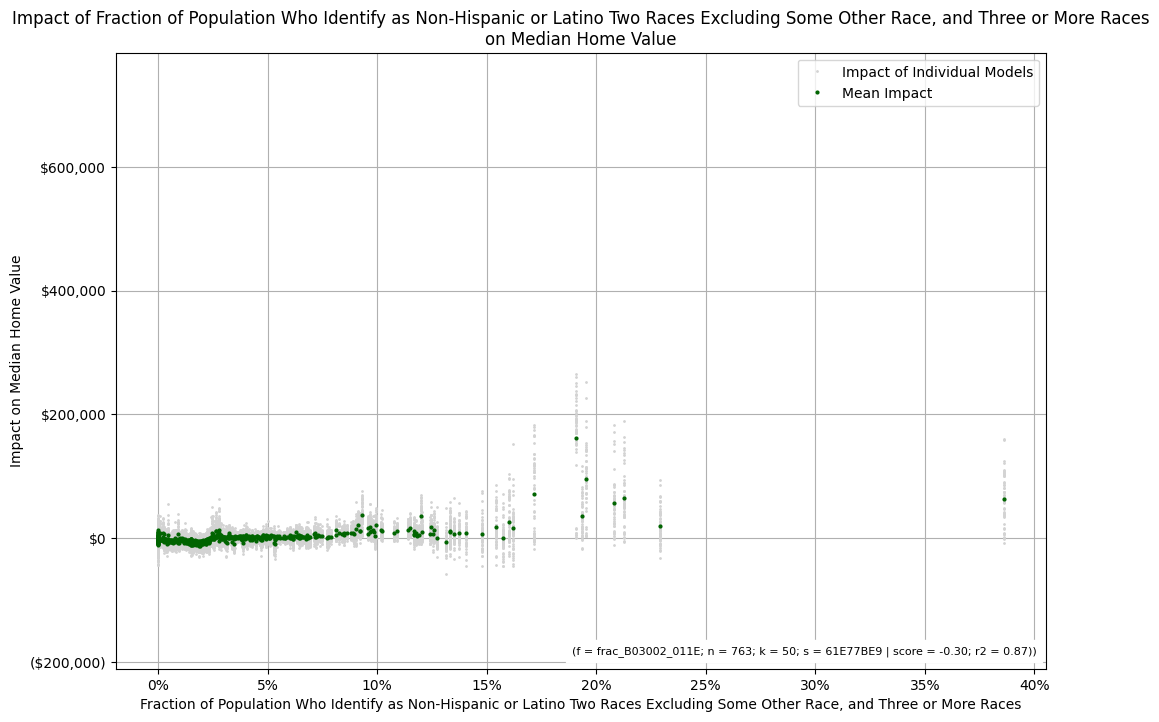

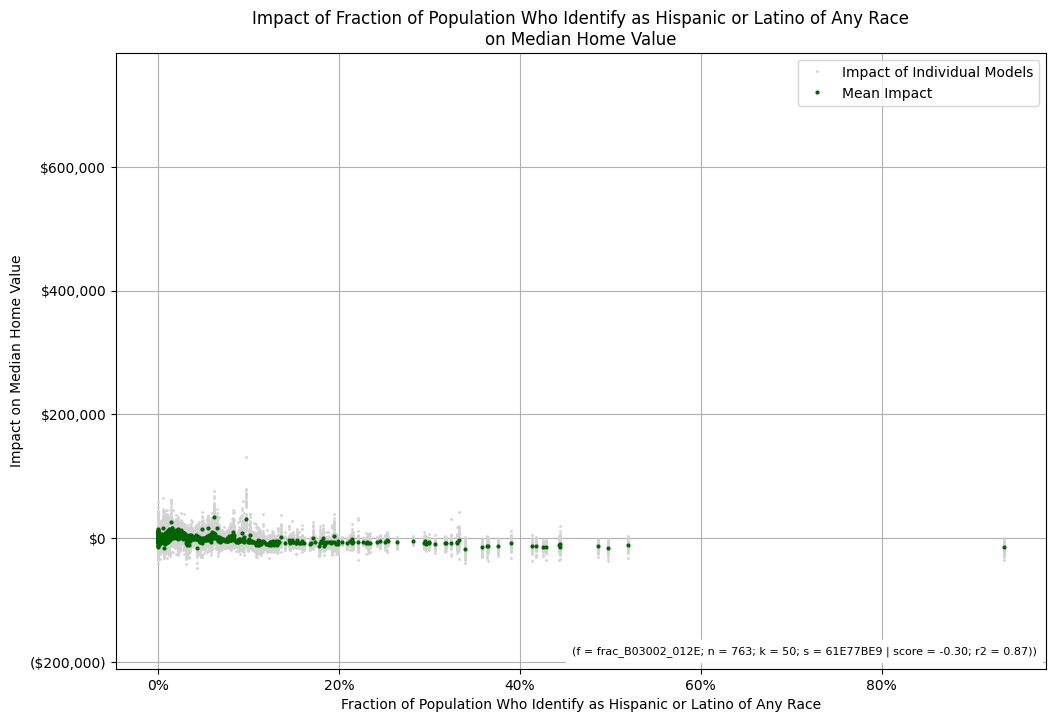

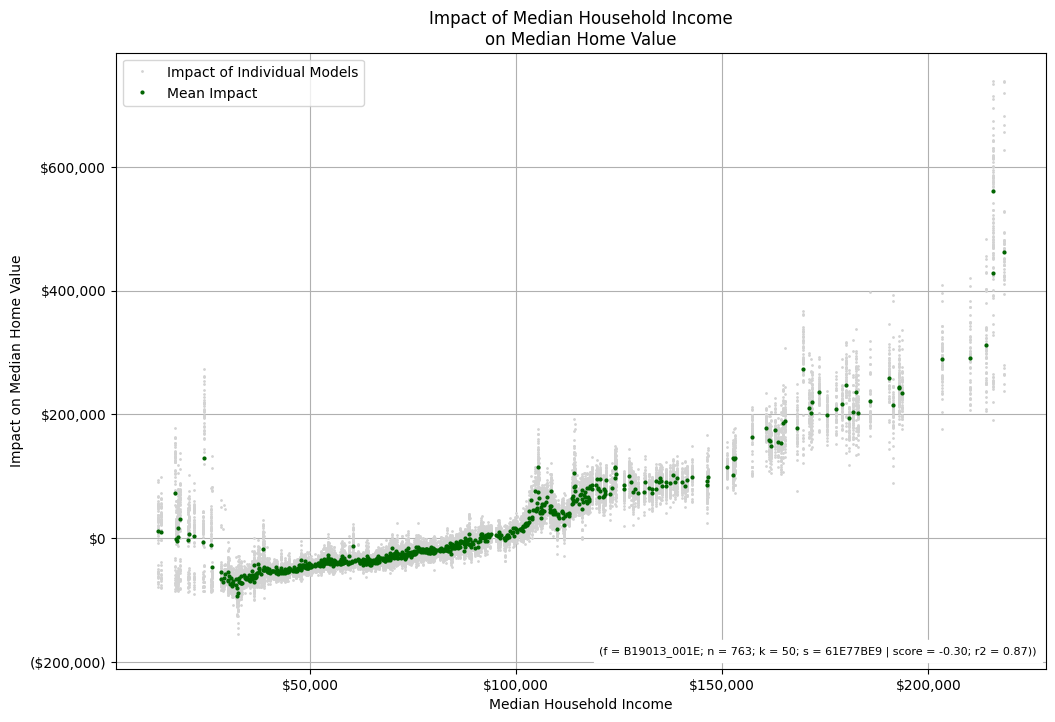

In [6]:
%%time

# This is where the heavy lifting of generating the impact charts happens:

impact_charts = impact_model.impact_charts(
    X,
    X.columns,
    subplots_kwargs=dict(
        figsize=(12, 8),
    ),
    # These will be used to label the axes.
    feature_names=feature_names,
    y_name=target_name,
    # The [xy]_formatter* arguments are for formatting the tick labels.
    # The impact is measured in dollars.
    y_formatter="dollar",
    # The features are all percentages, except for median income, which is dollars.
    x_formatters={dataset.FEATURE_MEDIAN_HOUSEHOLD_INCOME: "dollar"},
    x_formatter_default="percentage",
)

## Other CBSAs

There are over 900 CBSAs. If you want to locate one you are interested in,
the dataset module has a function to list them all. It is called 
`dataset.all_cbsas`.

It returns a data frame with the name and code for each of the CBSAs.
If you are looking for a particular one by name, you can just look
through the data frame either manually of programatically. The code below
shows how we found Richmond, VA is 40060.

In [7]:
df_cbsas = dataset.all_cbsas()

df_cbsas.head()

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,NAME
0,10100,"Aberdeen, SD Micro Area"
1,10140,"Aberdeen, WA Micro Area"
2,10180,"Abilene, TX Metro Area"
3,10220,"Ada, OK Micro Area"
4,10300,"Adrian, MI Micro Area"


In [8]:
df_cbsas[df_cbsas["NAME"].str.contains("Richmond")].reset_index(drop=True)

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,NAME
0,12260,"Augusta-Richmond County, GA-SC Metro Area"
1,39980,"Richmond, IN Micro Area"
2,40060,"Richmond, VA Metro Area"
3,40080,"Richmond-Berea, KY Micro Area"
